In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [140]:
results =pd.read_csv('results.csv',names=['resultId','raceId','driverId','constructorId','number','grid','position','positionText','positionOrder','points','laps','time','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId'],header=None)
races=pd.read_csv('races.csv',names=['raceId','year','round','circuitId','name','date','time','url'],header=None)
drivers=pd.read_csv('drivers.csv',names=['driverId','driverRef','number','code','forename','surname','dob','nationality','url'],header=None)
constructors=pd.read_csv('constructors.csv',names=['constructorId','constructorRef','name','nationality','url'],header=None)


In [141]:
df=pd.merge(results, races[['raceId','name','year','round']],on ='raceId', how='left')
df=pd.merge(df, drivers[['driverId','forename','surname','nationality']],on ='driverId',how='left')
df=pd.merge(df, constructors[['constructorId','name','nationality']],on= 'constructorId',how='left')

In [142]:
df.drop(['resultId','number','position','positionText','laps','statusId'],axis=1,inplace=True)


In [143]:
df.rename(columns={'name_x':'gp_name','name_y':'constructor_name','nationality_x':'gp_nationality','nationality_y':'constructor_nationality'})

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,gp_name,year,round,forename,surname,gp_nationality,constructor_name,constructor_nationality
0,18,1,1,1,1,10.0,34:50.6,5690616,39,2,01:27.5,218.3,Australian Grand Prix,2008,1,Lewis,Hamilton,British,McLaren,British
1,18,2,2,5,2,8.0,5.478,5696094,41,3,01:27.7,217.586,Australian Grand Prix,2008,1,Nick,Heidfeld,German,BMW Sauber,German
2,18,3,3,7,3,6.0,8.163,5698779,41,5,01:28.1,216.719,Australian Grand Prix,2008,1,Nico,Rosberg,German,Williams,British
3,18,4,4,11,4,5.0,17.181,5707797,58,7,01:28.6,215.464,Australian Grand Prix,2008,1,Fernando,Alonso,Spanish,Renault,French
4,18,5,1,3,5,4.0,18.014,5708630,43,1,01:27.4,218.385,Australian Grand Prix,2008,1,Heikki,Kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,1076,849,3,18,16,0.0,\N,\N,49,18,01:23.9,226.518,Australian Grand Prix,2022,3,Nicholas,Latifi,Canadian,Williams,British
25456,1076,4,214,10,17,0.0,\N,\N,57,2,01:20.8,235.024,Australian Grand Prix,2022,3,Fernando,Alonso,Spanish,Alpine F1 Team,French
25457,1076,830,9,2,18,0.0,\N,\N,37,6,01:21.7,232.633,Australian Grand Prix,2022,3,Max,Verstappen,Dutch,Red Bull,Austrian
25458,1076,20,117,17,19,0.0,\N,\N,17,19,01:25.2,223.042,Australian Grand Prix,2022,3,Sebastian,Vettel,German,Aston Martin,British


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25460 entries, 0 to 25459
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           25460 non-null  int64  
 1   driverId         25460 non-null  int64  
 2   constructorId    25460 non-null  int64  
 3   grid             25460 non-null  int64  
 4   positionOrder    25460 non-null  int64  
 5   points           25460 non-null  float64
 6   time             25460 non-null  object 
 7   milliseconds     25460 non-null  object 
 8   fastestLap       25460 non-null  object 
 9   rank             25460 non-null  object 
 10  fastestLapTime   25460 non-null  object 
 11  fastestLapSpeed  25460 non-null  object 
 12  name_x           25460 non-null  object 
 13  year             25460 non-null  int64  
 14  round            25460 non-null  int64  
 15  forename         25460 non-null  object 
 16  surname          25460 non-null  object 
 17  nationality_

In [145]:
df.drop(['raceId','driverId','constructorId','milliseconds','nationality_x','nationality_y'],axis=1,inplace=True)


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25460 entries, 0 to 25459
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             25460 non-null  int64  
 1   positionOrder    25460 non-null  int64  
 2   points           25460 non-null  float64
 3   time             25460 non-null  object 
 4   fastestLap       25460 non-null  object 
 5   rank             25460 non-null  object 
 6   fastestLapTime   25460 non-null  object 
 7   fastestLapSpeed  25460 non-null  object 
 8   name_x           25460 non-null  object 
 9   year             25460 non-null  int64  
 10  round            25460 non-null  int64  
 11  forename         25460 non-null  object 
 12  surname          25460 non-null  object 
 13  name_y           25460 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 2.9+ MB


In [147]:
df=df[['year','round','name_x','forename','surname','name_y','positionOrder','grid','points','time','fastestLapTime','rank','fastestLap','fastestLapSpeed']]

In [148]:
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [151]:
df.time.replace('\\N',np.nan,inplace=True)
df.fastestLap.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)



In [152]:
df.fastestLapSpeed=df.fastestLapSpeed.astype(float)

In [100]:
df.reset_index(drop=True,inplace=True)

In [101]:
df.head(20)

,year,round,name_x,forename,surname,name_y,positionOrder,grid,points,time,fastestLapTime,rank,fastestLap,fastestLapSpeed
0,2022,1,Bahrain Grand Prix,Charles,Leclerc,Ferrari,1,1,26.0,37:33.6,01:34.6,1,51,206.018
1,2022,1,Bahrain Grand Prix,Carlos,Sainz,Ferrari,2,3,18.0,5.598,01:35.7,3,52,203.501
2,2022,1,Bahrain Grand Prix,Lewis,Hamilton,Mercedes,3,5,15.0,9.675,01:36.2,5,53,202.469
3,2022,1,Bahrain Grand Prix,George,Russell,Mercedes,4,9,12.0,11.211,01:36.3,6,56,202.313
4,2022,1,Bahrain Grand Prix,Kevin,Magnussen,Haas F1 Team,5,7,10.0,14.754,01:36.6,8,53,201.641
5,2022,1,Bahrain Grand Prix,Valtteri,Bottas,Alfa Romeo,6,6,8.0,16.119,01:36.6,7,53,201.691
6,2022,1,Bahrain Grand Prix,Esteban,Ocon,Alpine F1 Team,7,11,6.0,19.423,01:37.1,14,53,200.63
7,2022,1,Bahrain Grand Prix,Yuki,Tsunoda,AlphaTauri,8,16,4.0,20.386,01:37.1,13,53,200.642
8,2022,1,Bahrain Grand Prix,Fernando,Alonso,Alpine F1 Team,9,8,2.0,22.39,01:36.7,10,44,201.412
9,2022,1,Bahrain Grand Prix,Guanyu,Zhou,Alfa Romeo,10,15,1.0,23.064,01:36.7,9,39,201.512


In [102]:

sb.set_palette('Set1')
plt.rcParams['figure.figsize']=20,12

In [103]:
winning_driver=df.loc[df['positionOrder']==1].groupby('surname')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

([], [])

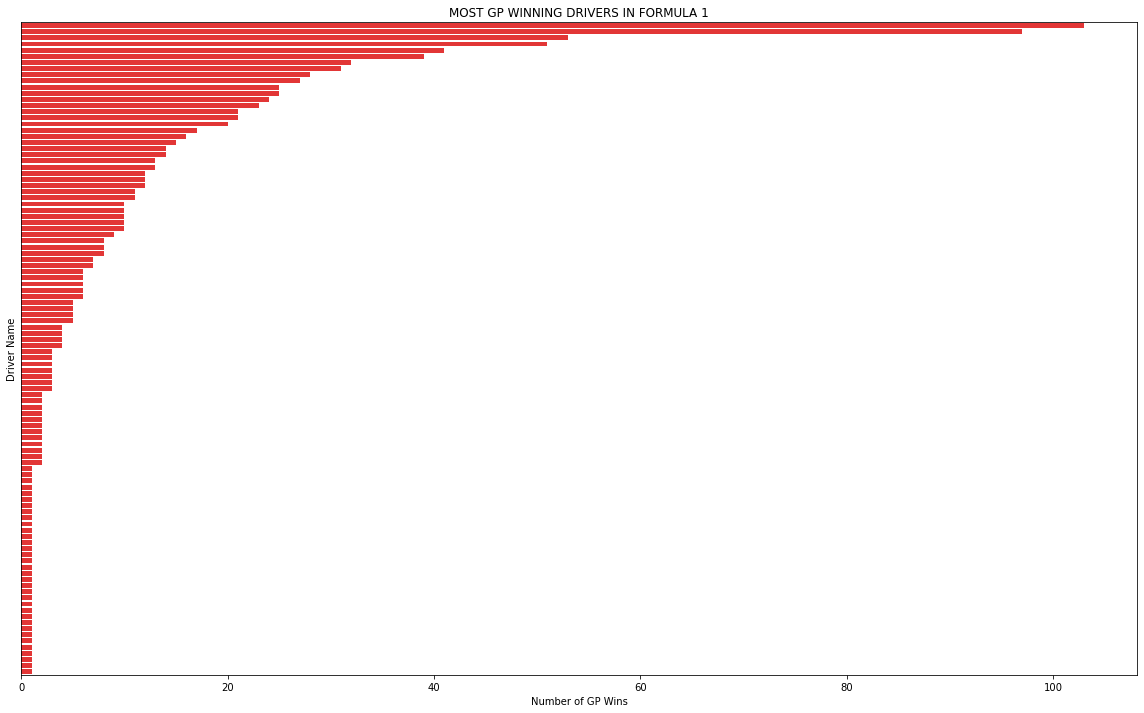

In [104]:
sb.barplot(data=winning_driver,x='positionOrder',y='surname',color='red',alpha=0.9)
plt.title('MOST GP WINNING DRIVERS IN FORMULA 1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])


In [105]:
top10drivers=winning_driver.head(10)

In [106]:
print(top10drivers)

      surname  positionOrder
0    Hamilton            103
1  Schumacher             97
2      Vettel             53
3       Prost             51
4       Senna             41
5        Hill             39
6      Alonso             32
7     Mansell             31
8     Rosberg             28
9     Stewart             27


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hamilton'),
  Text(0, 1, 'Schumacher'),
  Text(0, 2, 'Vettel'),
  Text(0, 3, 'Prost'),
  Text(0, 4, 'Senna'),
  Text(0, 5, 'Hill'),
  Text(0, 6, 'Alonso'),
  Text(0, 7, 'Mansell'),
  Text(0, 8, 'Rosberg'),
  Text(0, 9, 'Stewart')])

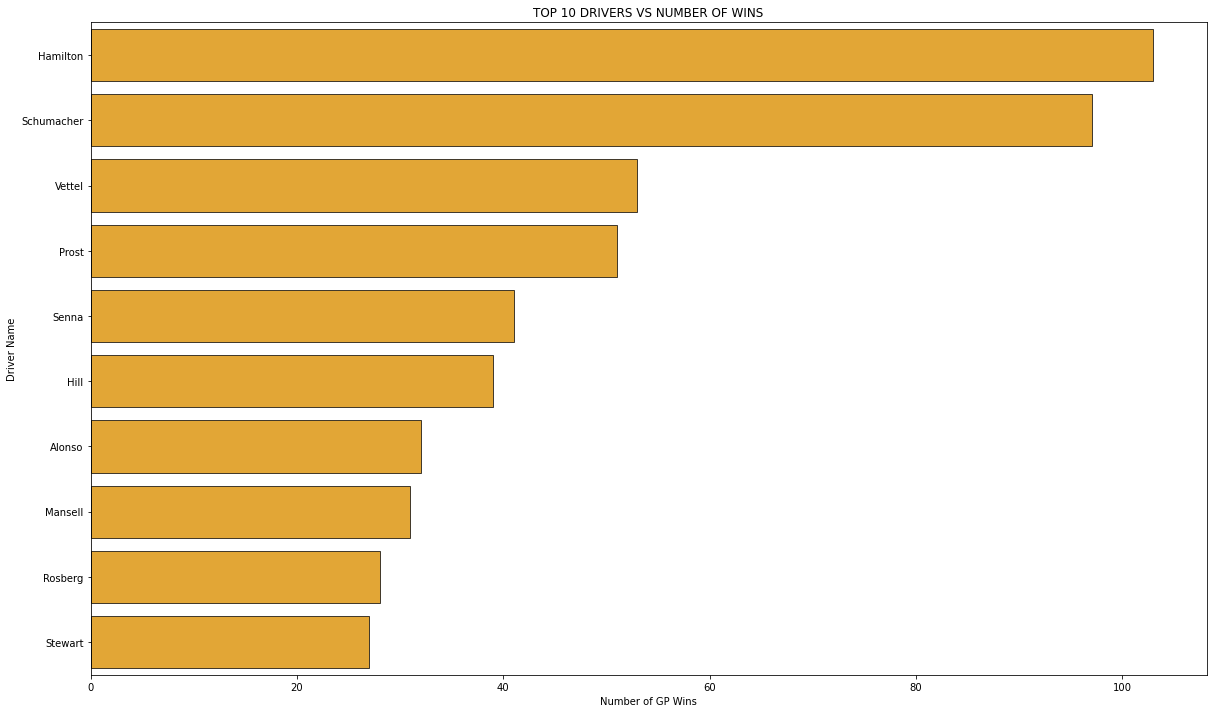

In [107]:
sb.barplot(data=top10drivers,x='positionOrder',y='surname',color='orange',alpha=0.9,linewidth=0.8,edgecolor='black')
plt.title('TOP 10 DRIVERS VS NUMBER OF WINS')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.yticks()

In [108]:
winning_constructor=df.loc[df['positionOrder']==1].groupby('name_y')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Ferrari'),
  Text(0, 1, 'McLaren'),
  Text(0, 2, 'Mercedes'),
  Text(0, 3, 'Williams'),
  Text(0, 4, 'Red Bull'),
  Text(0, 5, 'Team Lotus'),
  Text(0, 6, 'Renault'),
  Text(0, 7, 'Benetton'),
  Text(0, 8, 'Brabham'),
  Text(0, 9, 'Tyrrell'),
  Text(0, 10, 'Lotus-Climax'),
  Text(0, 11, 'BRM'),
  Text(0, 12, 'Cooper-Climax'),
  Text(0, 13, 'Lotus-Ford'),
  Text(0, 14, 'Alfa Romeo'),
  Text(0, 15, 'Vanwall'),
  Text(0, 16, 'Matra-Ford'),
  Text(0, 17, 'Ligier'),
  Text(0, 18, 'Maserati'),
  Text(0, 19, 'Brawn'),
  Text(0, 20, 'Brabham-Repco'),
  Text(0, 21, 'Kurtis Kraft'),
  Text(0, 22, 'McLaren-Ford'),
  Text(0, 23, 'Jordan'),
  Text(0, 24, 'Watson'),
  Text(0, 25, 'March'),
  Text(0, 26, 'Wolf'),
  Text(0, 27, 'Honda'),
  Text(0, 28, 'Cooper-Maserati'),
  Text

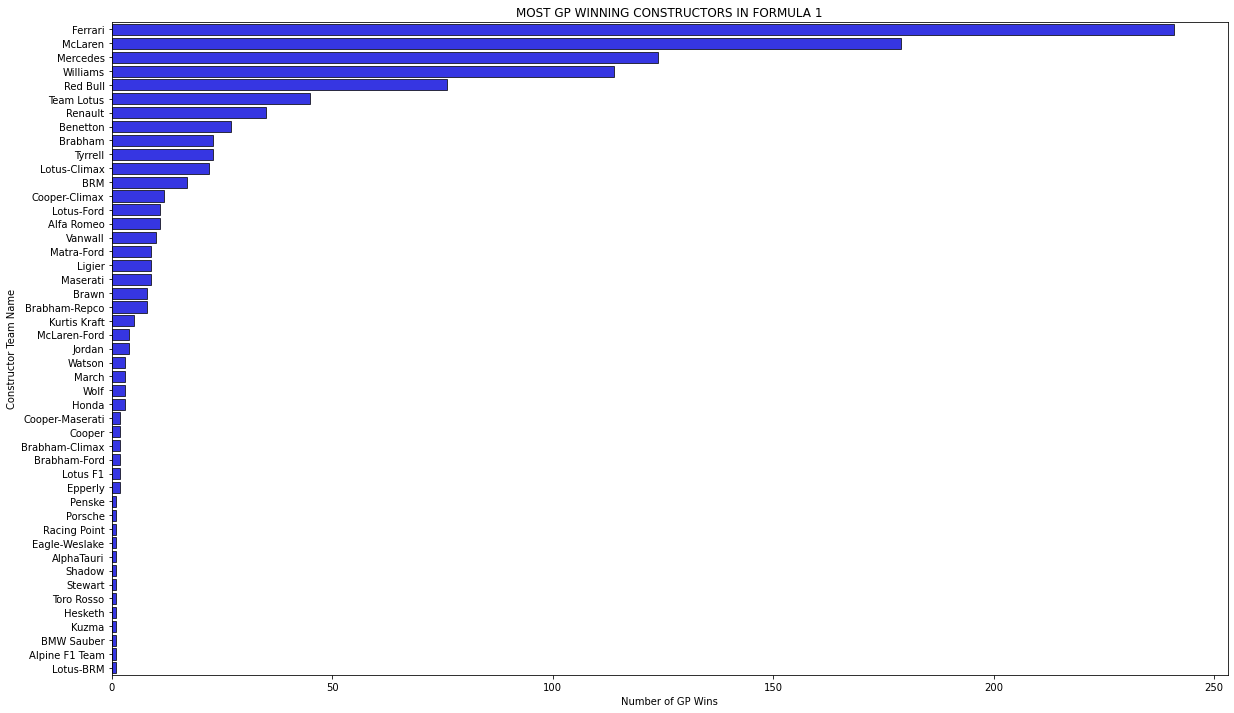

In [109]:
sb.barplot(data=winning_constructor,x='positionOrder',y='name_y',color='blue',alpha=0.9,linewidth=0.8,edgecolor='black')
plt.title('MOST GP WINNING CONSTRUCTORS IN FORMULA 1')
plt.ylabel('Constructor Team Name')
plt.xlabel('Number of GP Wins')
plt.yticks()

In [110]:
top10constructors=winning_constructor.head(10)

In [111]:
print(top10constructors)

       name_y  positionOrder
0     Ferrari            241
1     McLaren            179
2    Mercedes            124
3    Williams            114
4    Red Bull             76
5  Team Lotus             45
6     Renault             35
7    Benetton             27
8     Brabham             23
9     Tyrrell             23


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ferrari'),
  Text(0, 1, 'McLaren'),
  Text(0, 2, 'Mercedes'),
  Text(0, 3, 'Williams'),
  Text(0, 4, 'Red Bull'),
  Text(0, 5, 'Team Lotus'),
  Text(0, 6, 'Renault'),
  Text(0, 7, 'Benetton'),
  Text(0, 8, 'Brabham'),
  Text(0, 9, 'Tyrrell')])

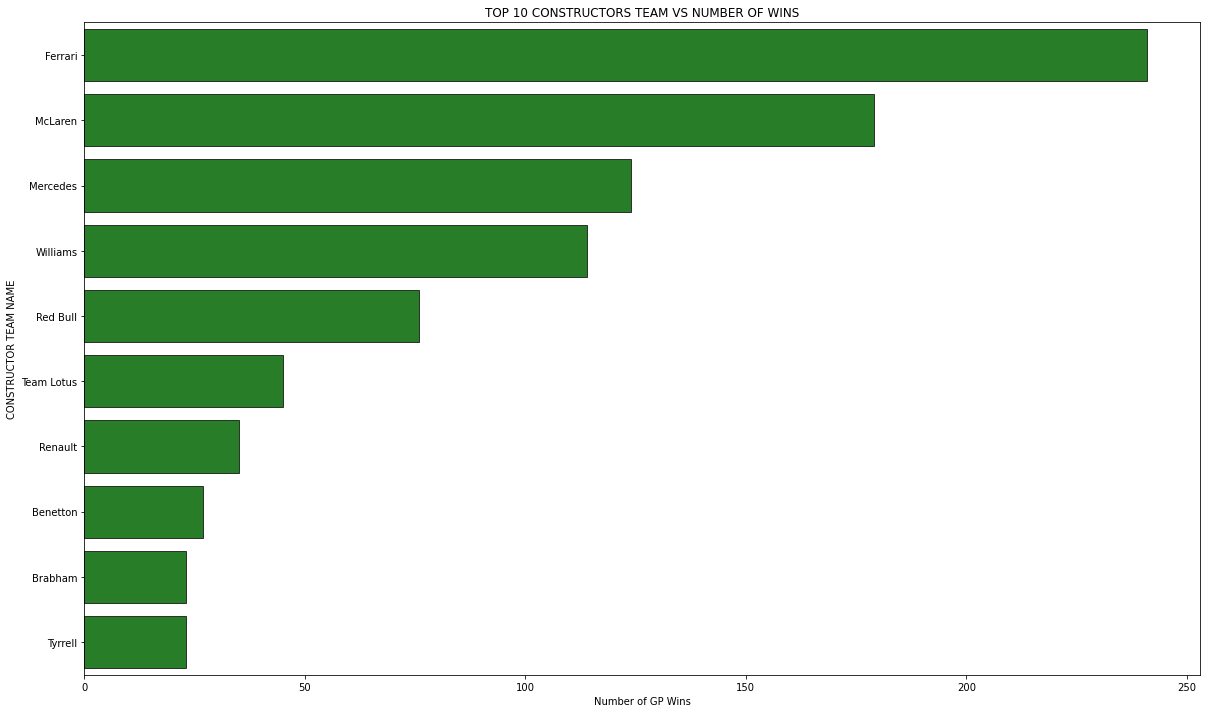

In [112]:
sb.barplot(data=top10constructors,x='positionOrder',y='name_y',color='green',alpha=0.9,linewidth=0.8,edgecolor='black')
plt.title('TOP 10 CONSTRUCTORS TEAM VS NUMBER OF WINS')
plt.ylabel('CONSTRUCTOR TEAM NAME')
plt.xlabel('Number of GP Wins')
plt.yticks()

In [113]:
df_nonzero=df[df['grid']!=0]

Text(0.5, 0, 'STARTING POSITION')

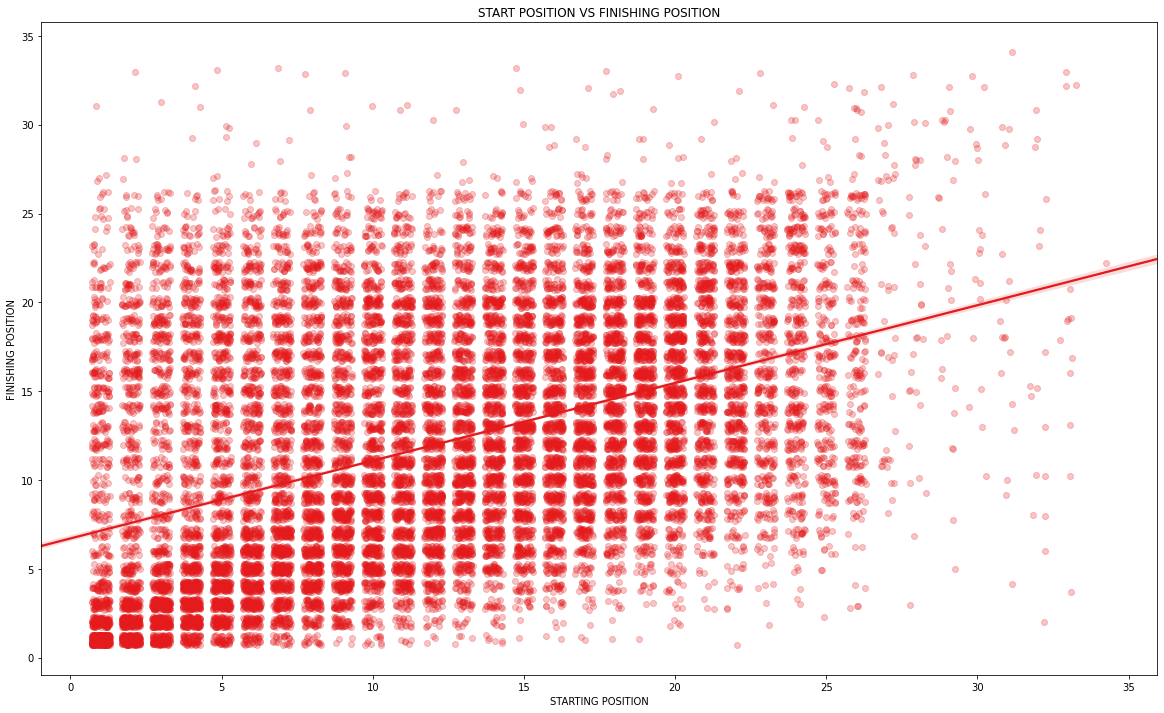

In [119]:
plt.figure(figsize=[20,12])
sb.regplot(data=df_nonzero,x='grid',y='positionOrder',x_jitter=0.3,y_jitter=0.3,scatter_kws={'alpha':0.25})
plt.title('START POSITION VS FINISHING POSITION')
plt.ylabel('FINISHING POSITION')
plt.xlabel('STARTING POSITION')


Text(0.5, 0.98, "Average speed amongst all teams during the fastest lap at Individual GP's")

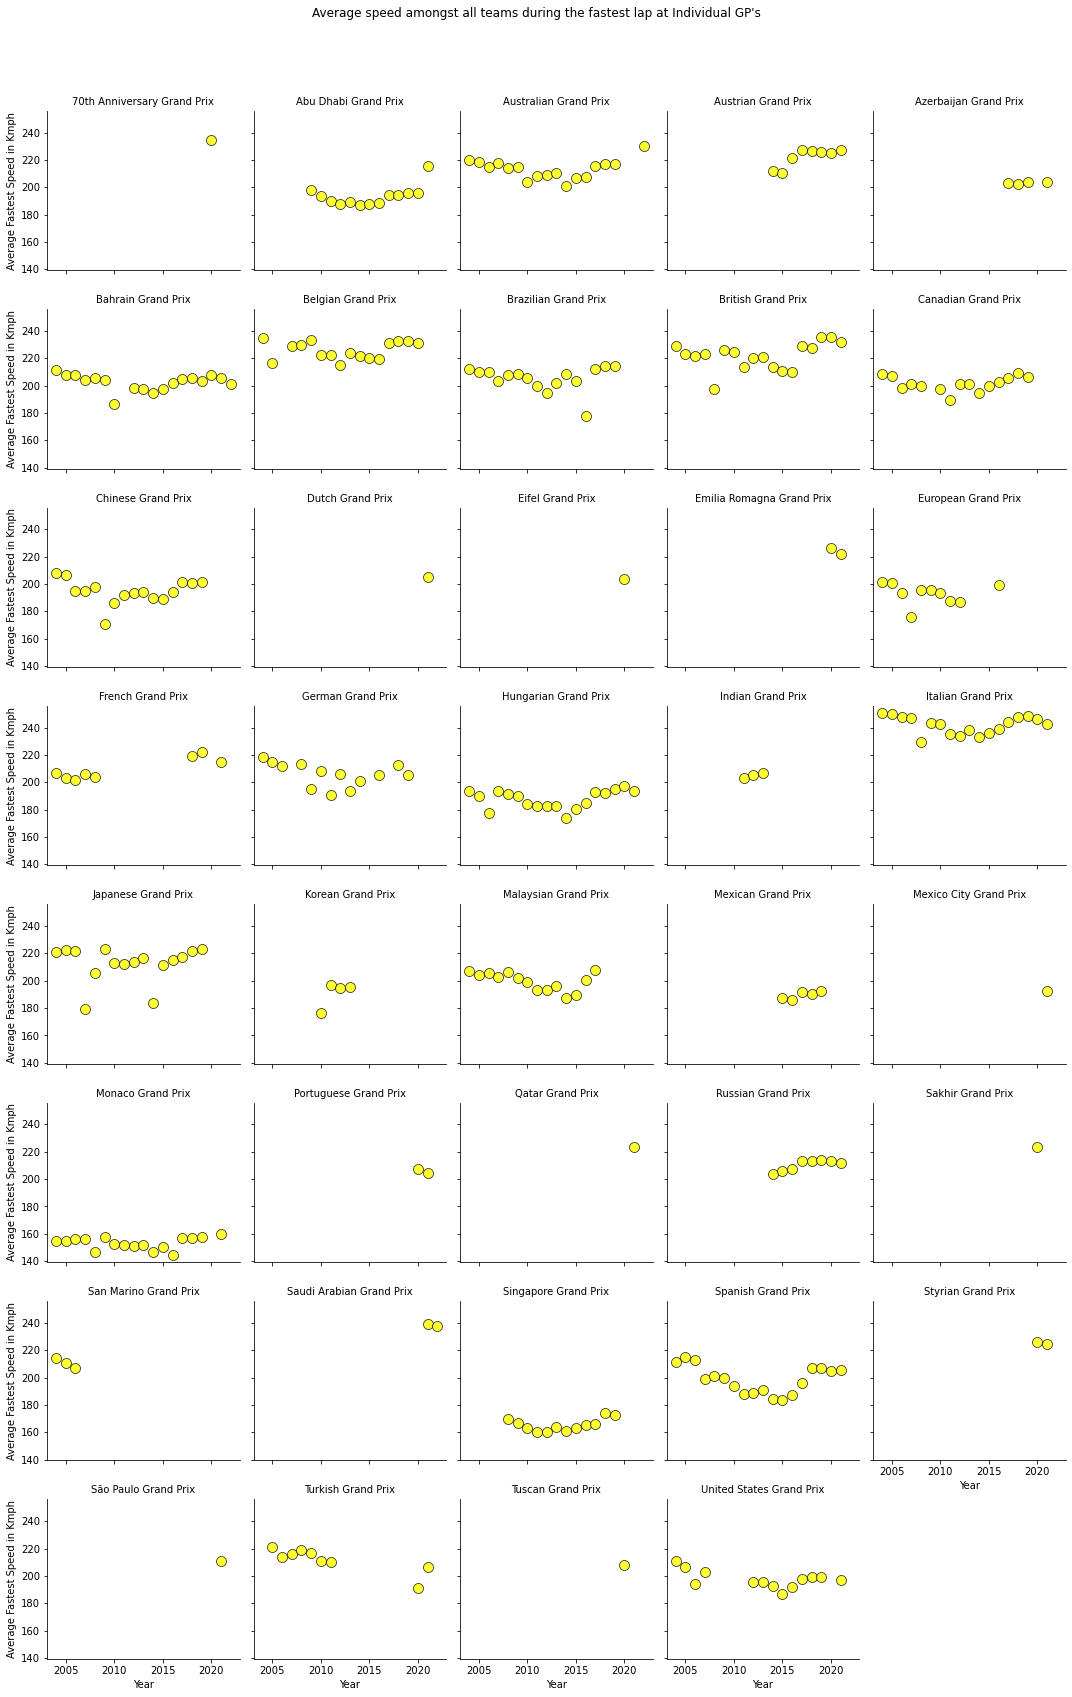

In [154]:
df_speed=df[df['year']>=2004]


df_group_speed=df_speed.groupby(['name_x','year'])['fastestLapSpeed'].mean().to_frame().reset_index()


grd=sb.FacetGrid(data=df_group_speed,col='name_x',col_wrap=5)

grd.map(plt.scatter,'year','fastestLapSpeed',linewidth=0.8,alpha=0.8,color='yellow',edgecolor='black',s=100)
grd.set_titles('{col_name}')
grd.set_xlabels('Year')
grd.set_ylabels('Average Fastest Speed in Kmph')
plt.subplots_adjust(top=0.92)
grd.fig.suptitle("Average speed amongst all teams during the fastest lap at Individual GP's")